In [6]:
# Mohammad Ali Zahir
# COMP 333 - Data Analytics
# Lab 13


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [8]:
# Load the dataset
df = pd.read_csv("./data/Portal_rodents_19772002_scinameUUIDs.csv", encoding = "ISO-8859-1")
df 

C:\Users\Ali\AppData\Local\Temp\ipykernel_28828\1427378546.py:2: DtypeWarning: Columns (11,12,13,16,17,18,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/Portal_rodents_19772002_scinameUUIDs.csv", encoding = "ISO-8859-1")


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,23.0,...,0F7659,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,77.0,...,701178,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,NaN,32.0,...,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,UT,NaN


# Situation

We will deal and analyze the data for the clean rodents file. This file connects the rodents available for places around the world and shows how long they may have lived. 

We want to analyze the data to find any correlation of where the rodents specicies may live.

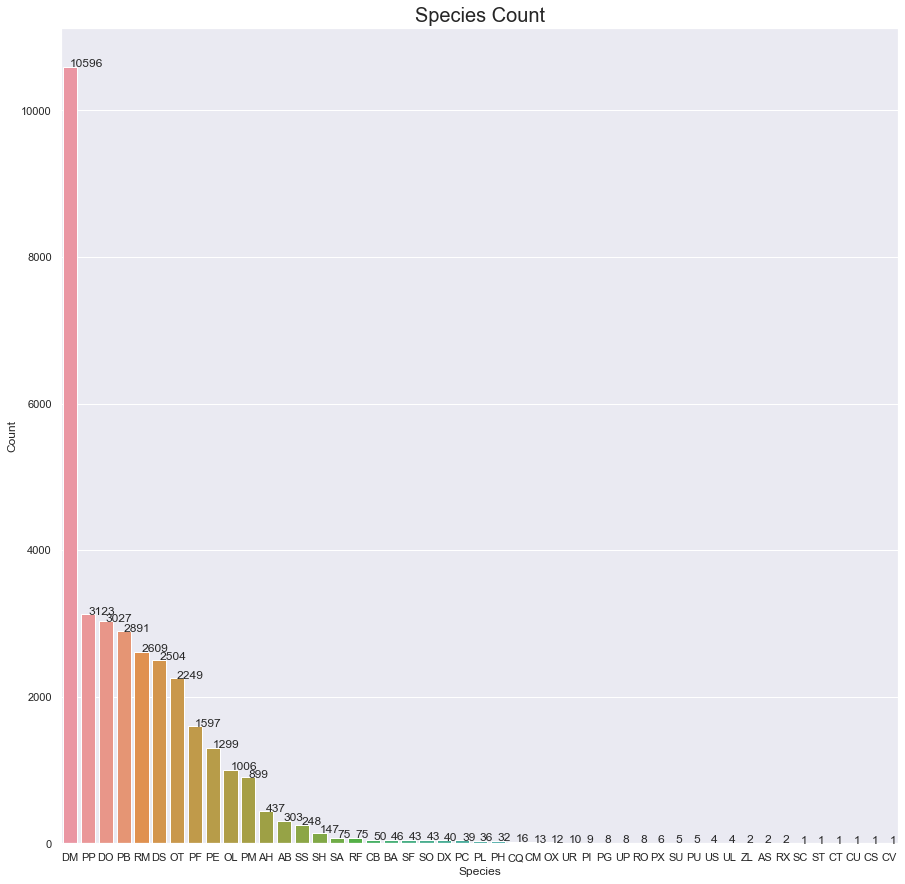

In [12]:

# group the dataframe by species and sum the counts
species_count = df['species'].value_counts()

plt.figure(figsize=(15,15))

sns.set(style='darkgrid')
# create a barplot using seaborn
ax = sns.barplot(x=species_count.index, y=species_count.values)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

# add labels to the plot
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Count', fontsize =20)
plt.show()


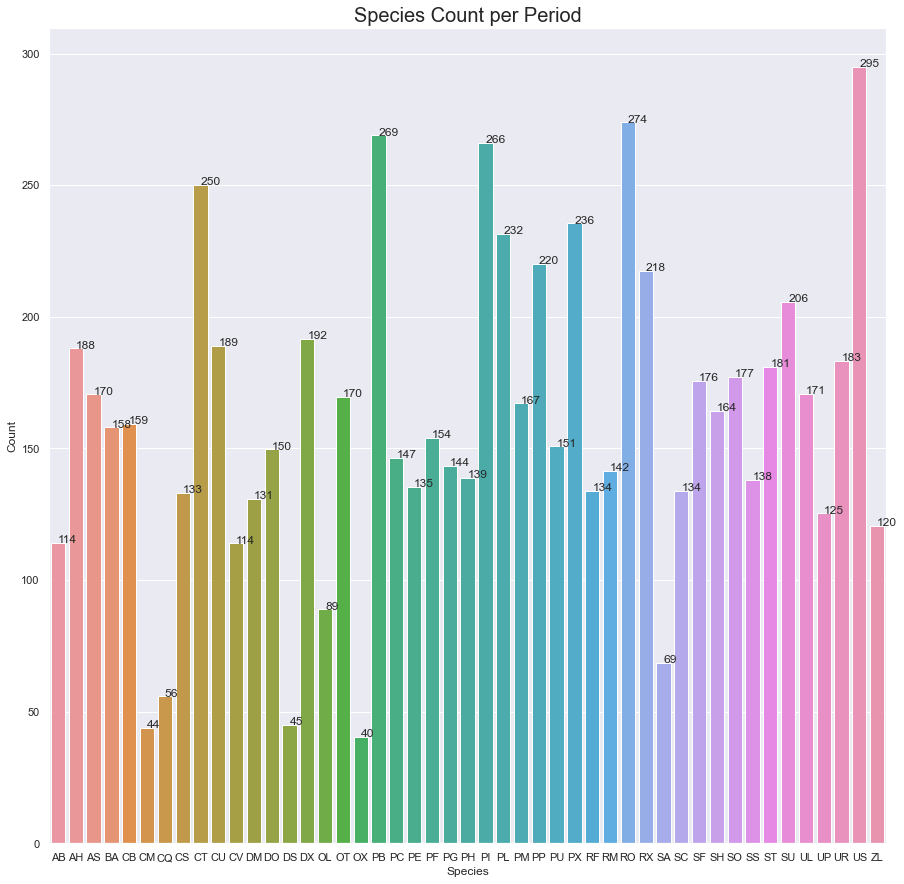

In [13]:
# group the dataframe by species and sum the counts
species_count = df.groupby('species')['period'].mean()

plt.figure(figsize=(15,15))

sns.set(style='darkgrid')
# create a barplot using seaborn
ax = sns.barplot(x=species_count.index, y=species_count.values)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

# add labels to the plot
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Count per Period', fontsize = 20)
plt.show()


# Problem

The features are not properly linked, hence the main concern here would be the features who are most correlated to the amount of species in a single area

# Solution

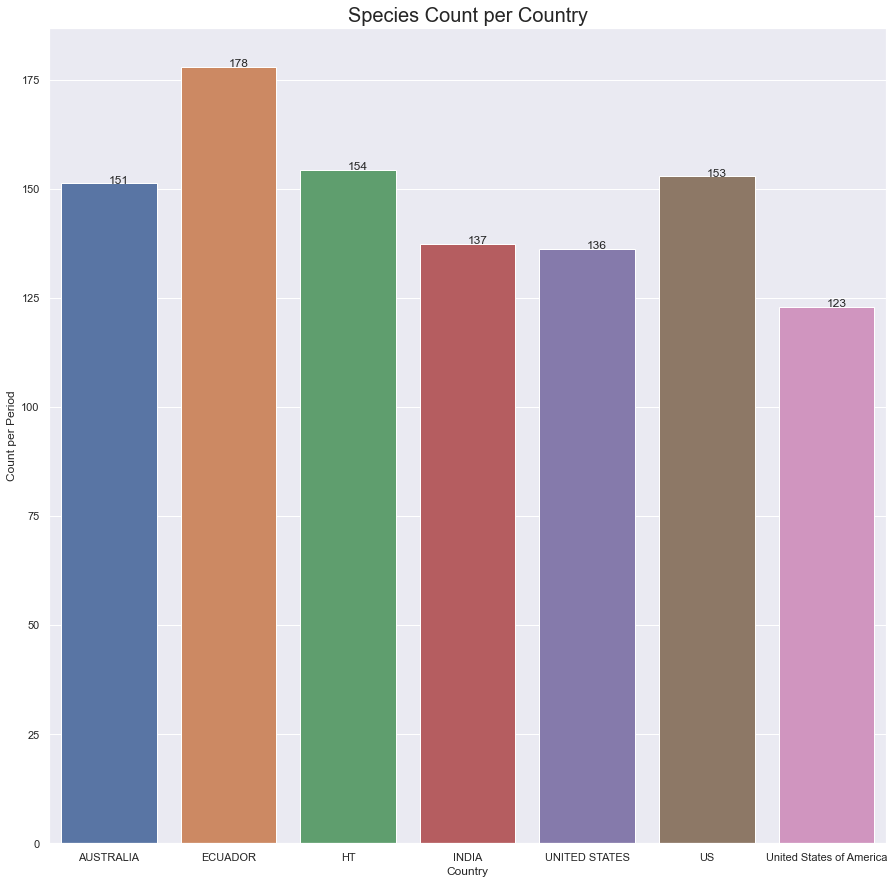

In [16]:
# group the dataframe by species and sum the counts
species_count = df.groupby('country')['period'].mean()

plt.figure(figsize=(15,15))

sns.set(style='darkgrid')
# create a barplot using seaborn
ax = sns.barplot(x=species_count.index, y=species_count.values)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

# add labels to the plot
plt.xlabel('Country')
plt.ylabel('Count per Period')
plt.title('Species Count per Country', fontsize = 20)
plt.show()

We can see here that the US here has the most amount of total periods of species. This can be attributed to the fact that the US has the most kind of species available in zoos and the wildlife.

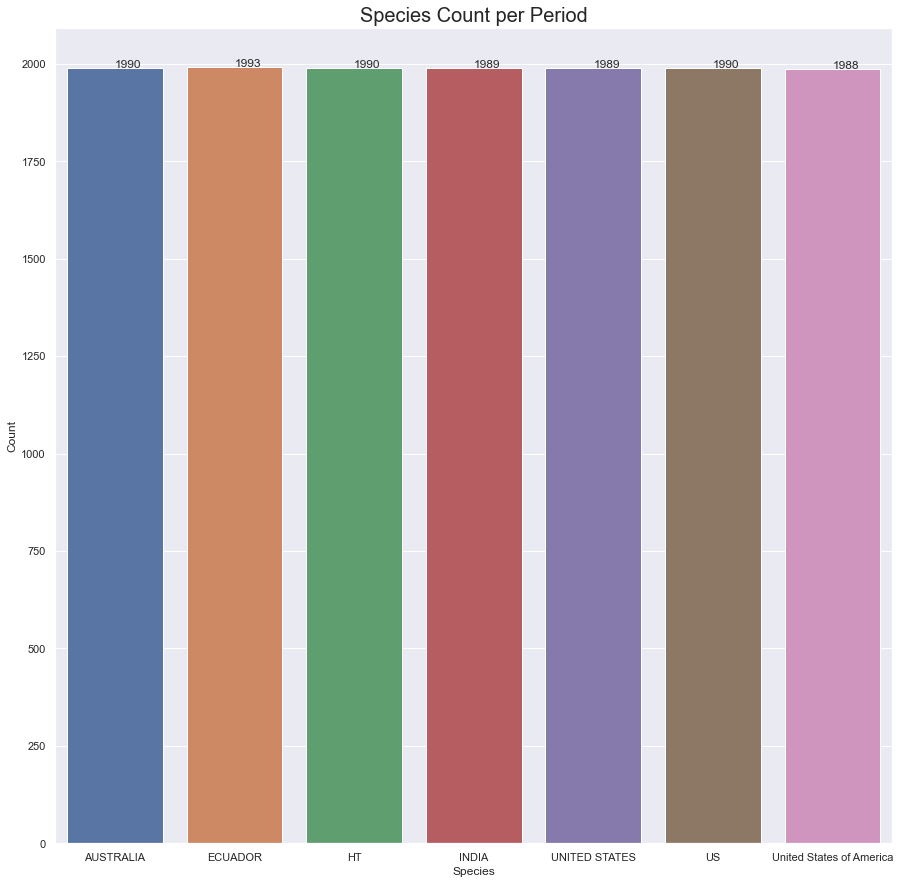

In [19]:
# group the dataframe by species and sum the counts
species_count = df.groupby('country')['yr'].mean()

plt.figure(figsize=(15,15))

sns.set(style='darkgrid')
# create a barplot using seaborn
ax = sns.barplot(x=species_count.index, y=species_count.values)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

# add labels to the plot
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Count per Period', fontsize = 20)
plt.show()

Again the same thing here the US main year was 1990, which is consistent with the barplot that we got above

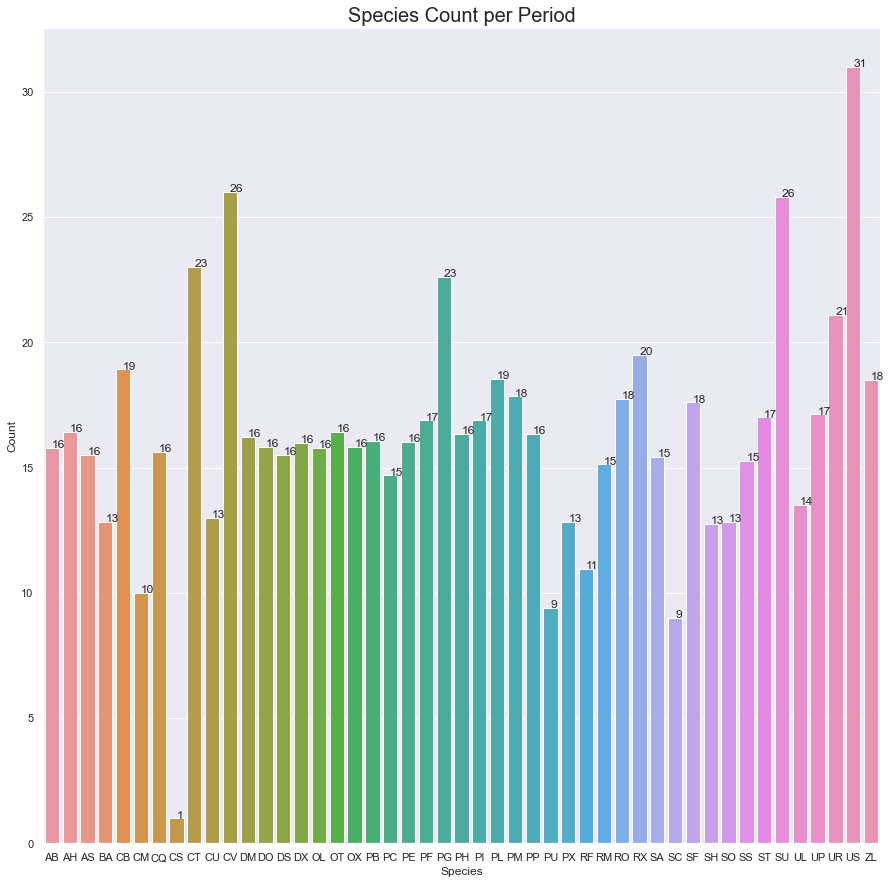

In [22]:
# group the dataframe by species and sum the counts
species_count = df.groupby('species')['dy'].mean()

plt.figure(figsize=(15,15))

sns.set(style='darkgrid')
# create a barplot using seaborn
ax = sns.barplot(x=species_count.index, y=species_count.values)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

# add labels to the plot
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Count per Period', fontsize = 20)
plt.show()

We can see here that the main days are at the end of the month where we have the most species. We can check if we found any correlations.

# Next Step

As we have not found any of the correlations that we have needed, we can conclude that the dataset was not properly balanced. Many of the columns were very random (such as note1, note2 etc), and the ones which were not random, were redundant such as mo, yr and day. This did not allow me to find any correlation. 

Hence no next step would be possible until we are able to find a possible correlation.